# COSC 3337 - Fall 2023 
# Task 5 AutoEncoder/Anomaly Detection
## Wikipedia Traffic Dataset
### Raunak Sarbajna

In [117]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

## Question 1
### Visualize the following dataset

In [118]:
# Load the data
data = pd.read_csv('wiki_lang_summ.csv', index_col=0)
data

,English,Japanese,German,French,Chinese,Russian,Spanish
Date,,,,,,,
01-07-2015,3513.862203,580.647056,714.968405,475.150994,240.582042,629.999601,1085.972919
02-07-2015,3502.511407,666.672801,705.229741,478.202000,240.941958,640.902876,1037.814557
03-07-2015,3325.357889,602.289805,676.877231,459.837659,239.344071,594.026295,954.412680
04-07-2015,3462.054256,756.509177,621.145145,491.508932,241.653491,558.728132,896.050750
05-07-2015,3575.520035,725.720914,722.076185,482.557746,257.779674,595.029157,974.508210
...,...,...,...,...,...,...,...
27-12-2016,6040.680728,789.158680,1085.095379,858.413100,376.019618,1001.209426,1133.367901
28-12-2016,5860.227559,790.500465,1032.640804,774.155769,378.048639,931.987685,1178.290923
29-12-2016,6245.127510,865.483236,994.657141,752.712954,350.719426,897.282452,1112.171085


## Question 1
### Enter your UH-ID here

In [119]:
uh_ID = 1111111
df_sel = data.iloc[:,[uh_ID%7]]
df_sel

,Japanese
Date,
01-07-2015,580.647056
02-07-2015,666.672801
03-07-2015,602.289805
04-07-2015,756.509177
05-07-2015,725.720914
...,...
27-12-2016,789.158680
28-12-2016,790.500465
29-12-2016,865.483236


In [120]:
training_mean = df_sel.mean()
training_std = df_sel.std()
df_training_value = (df_sel - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 550


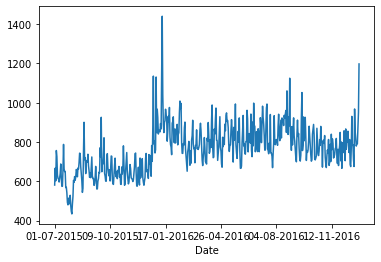

In [121]:
fig, ax = plt.subplots()
df_sel.plot(legend=False, ax=ax)
plt.show()


In [124]:
# Preprocess the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_sel)

## Question 1
### Modify the following train/test/validation split according to your need

In [125]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
X_train, X_test = train_test_split(data_scaled, test_size=1 - train_ratio, shuffle=False)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test = train_test_split(X_test, test_size=test_ratio/(test_ratio + validation_ratio), shuffle=False) 

print(X_train.shape)

(412, 1)


## Question 2
### Modify the following encoder/decoder layers. You can add/remove layers, change sizes, add dropouts.

In [126]:
# Input layer
input = tf.keras.layers.Input(shape=X_train.shape)

# Encoder layers
encoder = tf.keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu')])(input)

# Decoder layers
decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="sigmoid")])(encoder)

# Create the autoencoder
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 412, 1)]          0         
                                                                 
 sequential_13 (Sequential)  (None, 412, 4)            204       
                                                                 
 sequential_14 (Sequential)  (None, 412, 32)           728       
                                                                 
Total params: 932 (3.64 KB)
Trainable params: 932 (3.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Question 2
### Compile. Change the number of epochs and batch size to get a good loss value using the plot in the next cell.

In [127]:
# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder model
auto_history = autoencoder.fit(X_train, X_train, 
                epochs=50, 
                batch_size=32, 
                validation_data=(X_val, X_val),
                callbacks=[
                    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")],
               )


Epoch 1/50
13/13 [==============================] - 1s 19ms/step - loss: 0.0500 - val_loss: 0.0214
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0484 - val_loss: 0.0203
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0463 - val_loss: 0.0187
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0433 - val_loss: 0.0167
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0391 - val_loss: 0.0143
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0336 - val_loss: 0.0122
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0277 - val_loss: 0.0127
Epoch 8/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0230 - val_loss: 0.0148
Epoch 9/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 0.0147
Epoch 10/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0189 - val_loss: 0.0142
Epoch 11/50
13/13 

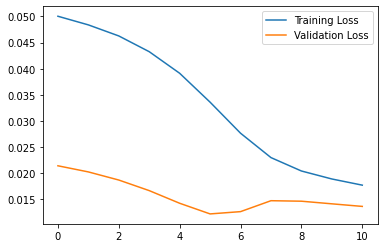

In [128]:
plt.plot(auto_history.history["loss"], label="Training Loss")
plt.plot(auto_history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()


## Question 2
### Three systems for finding error threshold are provided. Pick the best. Explain Why.
### Add a system for error threshold being 3-standard deviations.
(hint: mean(error) + 3*standard_deviation(error))

In [129]:
# Reconstruct the data
X_rec = autoencoder.predict(X_test)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.square(X_test - X_rec), axis=1)
# Set a threshold for the reconstruction error to determine anomalies
threshold = np.quantile(reconstruction_error, 0.99)
print("Reconstruction error threshold using 99 quantile: ", threshold)

# for check the prediction loss threshold for 2% of outliers
prediction_loss = tf.keras.losses.mae(X_rec, X_test)
threshold = np.percentile(prediction_loss, 98)
print("Reconstruction error threshold using 98 percentile: ", threshold)

# Get train MAE loss.
x_train_pred = autoencoder.predict(X_train)
train_mae_loss = np.mean(np.abs(x_train_pred - X_train), axis=1)
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

# Identify anomalies
anomalies = reconstruction_error > threshold

2/2 [==============================] - 0s 2ms/step
Reconstruction error threshold using 99 quantile:  0.016836231461684614
Reconstruction error threshold using 98 percentile:  0.23585387455173962
13/13 [==============================] - 0s 1ms/step
Reconstruction error threshold:  0.1532250554169467


## Question 2
### Explain the figures in the next three cells.
### Visualize the "anomalies" variable.

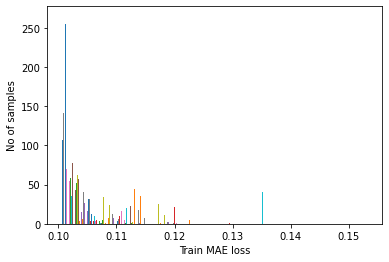

In [137]:
plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

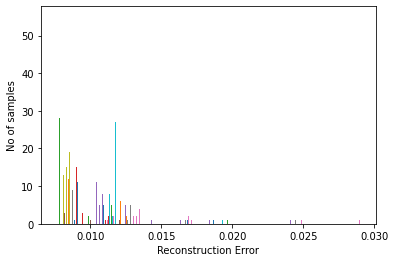

In [138]:
plt.hist(reconstruction_error, bins=50)
plt.xlabel("Reconstruction Error")
plt.ylabel("No of samples")
plt.show()

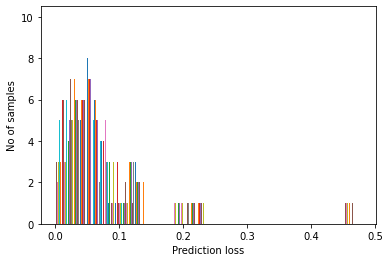

In [134]:
plt.hist(prediction_loss, bins=50)
plt.xlabel("Prediction loss")
plt.ylabel("No of samples")
plt.show()
